# Régression linéaire

trainfull : (1460, 81)
testfull : (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         146

A_Préparation_des_données.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
A_Préparation_des_données.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [
A_Préparation_des_données.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",


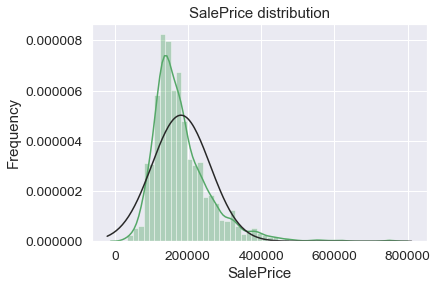

Skewness: 1.882876
Kurtosis: 6.536282


B_Exploration_des_données_outliers_sans_détail.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {


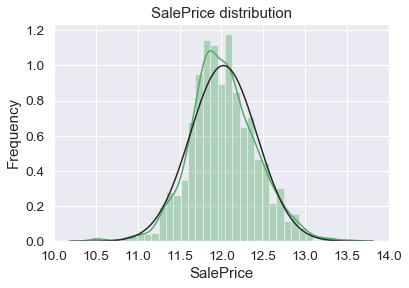

c:\users\utilisateur\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
B_Exploration_des_données_outliers_sans_détail.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {


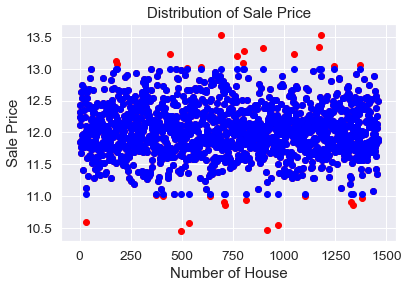

Most important features :
SalePrice        1.000000
OverallQual      0.799220
GrLivArea        0.675425
GarageCars       0.661457
GarageArea       0.628710
YearBuilt        0.587756
TotalBsmtSF      0.585655
FullBath         0.578577
1stFlrSF         0.565820
YearRemodAdd     0.555966
TotRmsAbvGrd     0.493532
Fireplaces       0.475728
MasVnrArea       0.396250
BsmtFinSF1       0.339860
OpenPorchSF      0.336205
WoodDeckSF       0.322995
GarageYrBlt      0.309966
2ndFlrSF         0.296917
HalfBath         0.296520
LotArea          0.244990
BsmtFullBath     0.234310
BsmtUnfSF        0.220597
BedroomAbvGr     0.179927
LotFrontage      0.167301
ScreenPorch      0.098909
MoSold           0.061423
3SsnPorch        0.060871
PoolArea         0.040788
BsmtFinSF2      -0.002582
MiscVal         -0.007305
BsmtHalfBath    -0.018116
YrSold          -0.028068
LowQualFinSF    -0.069045
OverallCond     -0.082600
MSSubClass      -0.088231
EnclosedPorch   -0.146783
KitchenAbvGr    -0.155561
Name: SalePr

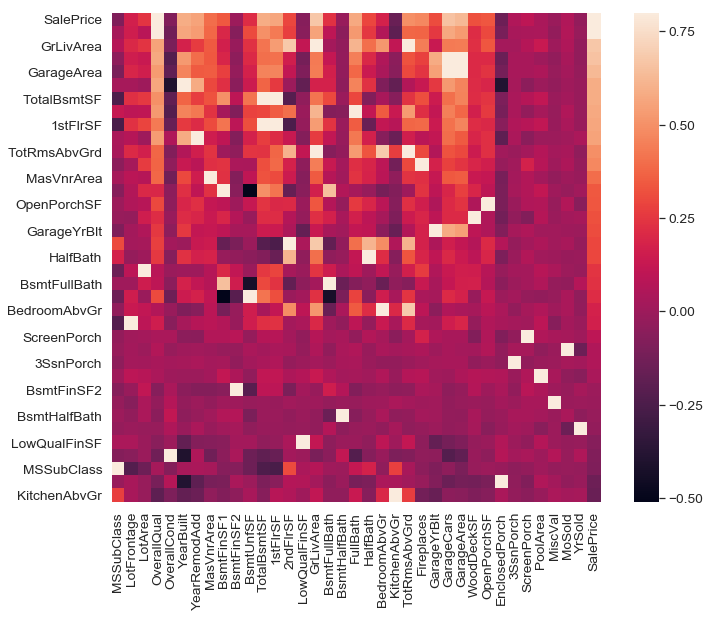

Les 10 variables les plus importantes :
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'YearBuilt', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')


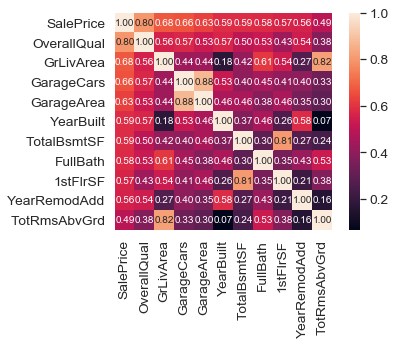

In [33]:
%run C_Selection_des_features.ipynb

In [34]:
train_ten_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 11 columns):
SalePrice       1430 non-null float64
OverallQual     1430 non-null int64
GrLivArea       1430 non-null int64
GarageCars      1430 non-null int64
GarageArea      1430 non-null int64
YearBuilt       1430 non-null int64
TotalBsmtSF     1430 non-null int64
FullBath        1430 non-null int64
1stFlrSF        1430 non-null int64
YearRemodAdd    1430 non-null int64
TotRmsAbvGrd    1430 non-null int64
dtypes: float64(1), int64(10)
memory usage: 134.1 KB


Ici nous avons que des variables numériques. Nous n'avons pas besoin de faire de transformation supplémentaire.

### Préparation du dataset pour la prédiction

Pour cela nous avons besoin de supprimer la variable 'output/target' `SalePrice`.

In [35]:
y = train_ten_ft['SalePrice']
train_ten_ft = train_ten_ft.drop(['SalePrice'], axis = 1)

Split:

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_ten_ft,y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('Our training target/prediction variable contains :',len(y_train) ,'rows')
print('Our training input variables contains :',len(X_train) ,'rows')
print('Our testing target/prediction variables contains :',len(y_test) ,'rows')
print('Our testing input variable contains :',len(X_test) ,'rows')

Our training target/prediction variable contains : 1144 rows
Our training input variables contains : 1144 rows
Our testing target/prediction variables contains : 286 rows
Our testing input variable contains : 286 rows


### Le modèle

#### Initialisation du modèle

Ridge Regression est utilisée pour réduire les valeurs de coefficient du modèle pour les variables qui souffrent de multicollinéarité. Pour ce faire, il utilise une fonction de régularisation pour contrôler le biais. La force de l'ajustement est déterminée par la valeur alpha. 

In [37]:
import sklearn.metrics
from sklearn.linear_model import Ridge

reg_model = Ridge(alpha=1, solver= 'svd')

#### Cross-validation

In [38]:
# Entrainement du modèle
reg_model.fit(X_train, y_train)

# Coefficients
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_}))

       features  coeficients
0   OverallQual     0.090315
1     GrLivArea     0.000211
2    GarageCars     0.083725
3    GarageArea     0.000029
4     YearBuilt     0.001741
5   TotalBsmtSF     0.000073
6      FullBath    -0.014790
7      1stFlrSF     0.000059
8  YearRemodAdd     0.002079
9  TotRmsAbvGrd     0.002145


À partir des coefficients que nous venons de calculer, nous pouvons définir notre fonction de prédiction comme telle:<br>
<br>SalesPrice = 0.09[OverallQual] + 0[GrLivArea] + 0.09[GarageCars] + 0[GarageArea] + 0[YearBuilt] + 0[TotalBsmtSF] + 0[FullBath] + 0[FullBath] + 0[1stFlrSF] + 0[YearRemodAdd] + 0[TotRmsAbvGrd]<br>
<br>
Ces valeurs sont une indication du poids que cette variable a pour expliquer les données. Ainsi, nous pouvons voir que les variables les plus importantes sont `OverallQual` et `GarageCars`. Les autres variables n'ont pas d'impact sur le modèle de prédiction. <br>
Soit : **`SalesPrice` = 0.09`OverallQual` + 0.09`GarageCars`**

In [39]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = Ridge() #initialisation de la méthode
cv_scores = cross_val_score(cv_reg_model, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation scores: {}'.format(cv_scores.round(2)))
print("\nAverage 10-Fold CV Score: {}".format(np.mean(cv_scores).round(3)))

Cross Validation scores: [0.77 0.87 0.85 0.83 0.73 0.38 0.83 0.8  0.85 0.86]

Average 10-Fold CV Score: 0.779


#### Test du modèle

Sample predictions for the first 5 houses are:
 [12.135 11.659 12.508 11.942 11.74 ]


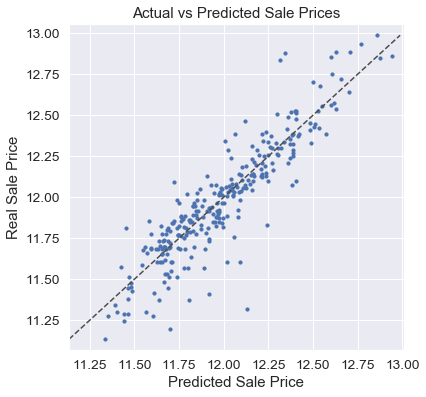

In [40]:
# We will predict the Sales Price of our test sett
y_pred = reg_model.predict(X_test)
print('Sample predictions for the first 5 houses are:\n', y_pred[:5].flatten().round(3))

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
# We create a new dataframe containing both the real (y_test) and the predicted value by the model (y_pred)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

# Let's represent the preducted values vs the real House value
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['SalePrice'].max()
minlimit = pred_act_df['SalePrice'].min()

plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['SalePrice'], s=10)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Real Sale Price')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.plot([minlimit,maxlimit], [minlimit,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted Sale Prices')
plt.show()

Ce graphique représente les valeurs réelles de `SalePrice` par rapport à ses valeurs prédites par le modèle. Plus les points de la diagonale sont proches, meilleure est la précision de nos prévisions (cela signifierait que nos valeurs prédites correspondent aux valeurs réelles). Les points au-dessus de la ligne indiquent une valeur de prédiction inférieure à la valeur réelle et vice versa.

#### Evaluation du modèle

Pour les modèles de régression qui traitent de la prévision des valeurs numériques, les mesures d'évaluation sont les suivantes:
    - Erreur quadratique moyenne (RMSE)
    - R-carré (R^2)
    - Residual Plots

**Root Mean Squared Error (RMSE)**

Le RMSE est une très bonne métrique pour évaluer les modèles de régression car il fournit une valeur claire qui représente le montant de «l'erreur» totale dans le modèle. Une valeur RMSE inférieure est souhaitée.

In [41]:
from sklearn.metrics import mean_squared_error

y_pred_test = reg_model.predict(X_test)
y_pred_train = reg_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test)).round(3)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)).round(3)

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 0.162
Root Mean Squared Error of Testing Set: 0.153


**R-squared (R^2)**

R^2 explique la quantité de variabilité du modèle attribuée à la variable cible, dans notre cas `SalePrice`. Les valeurs R^2 sont toujours comprises entre 0 et 1, généralement plus la valeur est élevée, mieux c'est. Il nous indique dans quelle mesure notre modèle s'est bien adapté aux données.

In [42]:
#R2 for the training and testing scores
print("Training set score: {:.2f}".format(reg_model.score(X_train, y_train)))

print("Average Cross-Validation Score: {}".format(np.mean(cv_scores).round(2)))

Training set score: 0.80
Average Cross-Validation Score: 0.78


**Residual plot**

Les Residual plots sont les différences entre les valeurs réelles prédites dans chaque combinaison de valeurs des variables explicatives et la prédiction correspondante de la réponse calculée à l'aide du mode. Dans notre cas d'étude, ils seront le prix réel de la maison et celui prédit par le modèle.

Une façon vraiment intuitive de les analyser est de les tracer. Il s'agit d'un graphique qui trace chaque erreur résiduelle positive et négative qui est le résultat de valeurs réelles moins les valeurs prédites.

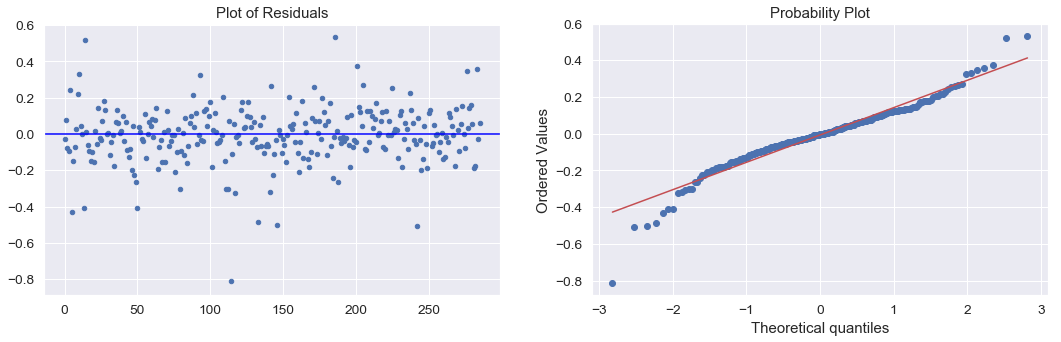

In [43]:
from scipy import stats

# Let's first calculate the residuals
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index(drop=True)
residuals = y_test - y_pred[0]

# Plot the residuals
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)

# Plot the Probability plot
plt.subplot(1,2,2)
plt.title('Probability Plot')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()

Le graphique des résidus (graphique de gauche) révèle que nos valeurs d'erreur sont réparties assez uniformément sur la moyenne attendue de zéro, c'est un bon signe. Cependant, il existe quelques valeurs aberrantes distinctes.

Le graphique de probabilité indique également que les résidus ne sont pas exactement «normaux». La légère forme descendante de la courbe implique une distribution asymétrique à droite et les valeurs aberrantes sont très évidentes. Il se pourrait que les valeurs aberrantes affectent la précision de notre modèle et leur traitement pourrait nous apporter de meilleurs résultats.

### Prédiction

In [44]:
test_pred = reg_model.predict(test_ten_ft)
print('Sample predictions for the first 5 houses are:\n', test_pred[:5].round(3))

Sample predictions for the first 5 houses are:
 [11.65  11.869 12.014 12.102 12.235]


In [45]:
test_pred = np.expm1(test_pred)
print('Sample predictions for the first 5 houses are:\n', test_pred[:5].round(3))

Sample predictions for the first 5 houses are:
 [114685.701 142726.913 165002.097 180235.036 205821.764]


In [46]:
submission = pd.DataFrame()
submission['Id'] = testfull['Id']
submission['SalePrice'] = test_pred

In [47]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [48]:
submission.to_csv('submission_ten_features_lr2.csv', index=False)

In [49]:
import kaggle
kaggle.api.competition_submit("submission_ten_features_lr2.csv", "seed0.2", "house-prices-advanced-regression-techniques")

100%|██████████| 35.1k/35.1k [00:03<00:00, 10.8kB/s]
c:\users\utilisateur\python\python37\lib\site-packages\kaggle\api\kaggle_api_extended.py:515: ResourceWarning: unclosed <ssl.SSLSocket fd=3640, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.103', 52644), raddr=('172.217.19.234', 443)>
  url_result['createUrl'], quiet)


Successfully submitted to House Prices: Advanced Regression Techniques

score Kaggle : 0.16703

# XGboost

In [56]:
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

In [57]:
xgboost_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred_test_xgb = xgboost_model.predict(X_test)
y_pred_train_xgb = xgboost_model.predict(X_train)

print("XGBoost RMSE on Training set :", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)).round(3))
print("XGBoost RMSE on Test set :", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)).round(3))

c:\users\utilisateur\python\python37\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
c:\users\utilisateur\python\python37\lib\site-packages\xgboost\sklearn.py:207: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


XGBoost RMSE on Training set : 0.14
XGBoost RMSE on Test set : 0.078


In [58]:
y_pred_test_xgboost = xgboost_model.predict(X_test)
y_pred_train_xgboost = xgboost_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test_xgboost)).round(3)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_xgboost)).round(3)

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 0.078
Root Mean Squared Error of Testing Set: 0.14


In [60]:
test_pred_xgb = xgboost_model.predict(test_ten_ft)

In [64]:
submission_xgb = pd.DataFrame()
submission_xgb['Id'] = testfull['Id']
submission_xgb['SalePrice'] = np.expm1(test_pred_xgb)

In [65]:
submission_xgb.to_csv('submission_ten_features_xgb_seed2.csv', index=False)

In [66]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [67]:
import kaggle
kaggle.api.competition_submit("submission_ten_features_xgb_seed2.csv", "xgb", "house-prices-advanced-regression-techniques")

100%|██████████| 22.6k/22.6k [00:03<00:00, 6.97kB/s]
c:\users\utilisateur\python\python37\lib\site-packages\kaggle\api\kaggle_api_extended.py:515: ResourceWarning: unclosed <ssl.SSLSocket fd=3588, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.103', 52676), raddr=('216.58.198.202', 443)>
  url_result['createUrl'], quiet)


Successfully submitted to House Prices: Advanced Regression Techniques

score kaggle :0.16271